<a href="https://colab.research.google.com/github/tirthmagnus/CS-668-CS-668-/blob/main/Cs_668__EDa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

from sklearn.metrics import r2_score


# Load the dataset
data = pd.read_excel('/content/SalesForCourse_quizz_table.xlsx')



In [2]:
# Display the first few rows of the dataset
data.head()


,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [3]:
data.shape

(34867, 15)

In [4]:
# Display basic information about the data
print(data.info())

# Display summary statistics for numerical columns
numeric_summary = data.describe(include=np.number).T[['min', '25%', '50%', '75%', 'max']]
print(numeric_summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Year              34866 non-null  float64       
 2   Month             34866 non-null  object        
 3   Customer Age      34866 non-null  float64       
 4   Customer Gender   34866 non-null  object        
 5   Country           34866 non-null  object        
 6   State             34866 non-null  object        
 7   Product Category  34866 non-null  object        
 8   Sub Category      34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit Cost         34866 non-null  float64       
 11  Unit Price        34866 non-null  float64       
 12  Cost              34866 non-null  float64       
 13  Revenue           34867 non-null  float64       
 14  Column1           2574

In [5]:
# Replace non-finite values in 'Year' with a placeholder
data['Year'].replace([np.inf, -np.inf, np.nan], -1, inplace=True)

# Convert 'Year' to integer
data['Year'] = data['Year'].astype(int)

# Replace non-finite values in 'Year' with a placeholder
data['Customer Age'].replace([np.inf, -np.inf, np.nan], -1, inplace=True)
# Convert 'Customer Age' to integer
data['Customer Age'] = data['Customer Age'].astype(int)


In [6]:
# Check updated data types
data.dtypes


Date                datetime64[ns]
Year                         int64
Month                       object
Customer Age                 int64
Customer Gender             object
Country                     object
State                       object
Product Category            object
Sub Category                object
Quantity                   float64
Unit Cost                  float64
Unit Price                 float64
Cost                       float64
Revenue                    float64
Column1                    float64
dtype: object

In [7]:
# Check for null values and count them in DataFrame
null_counts = data.isnull().sum()
print(null_counts)


Date                    1
Year                    0
Month                   1
Customer Age            0
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64


In [8]:
unique_counts = data.nunique()
print(unique_counts)


Date                 576
Year                   3
Month                 12
Customer Age          71
Customer Gender        2
Country                4
State                 45
Product Category       3
Sub Category          17
Quantity               3
Unit Cost            882
Unit Price          5175
Cost                 417
Revenue             3023
Column1             1281
dtype: int64


In [9]:
data = data.drop("Column1",axis=1)
data=data.dropna()

In [10]:
data.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016-02-19,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2016-02-20,2016,February,29,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2016-02-27,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


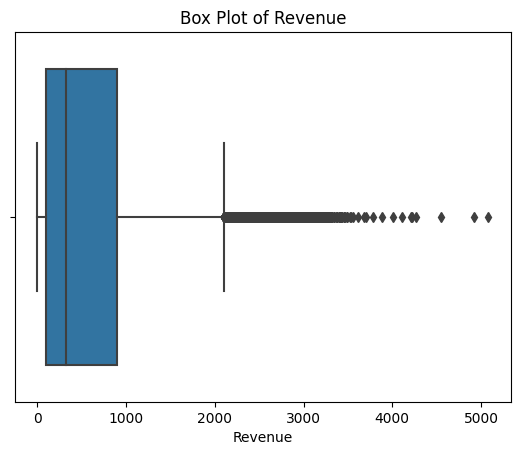

In [11]:
# Box Plot 'Revenue'
sns.boxplot(x=data['Revenue'])
plt.title('Box Plot of Revenue')
plt.show()


In [12]:
# Calculate skewness of the 'Revenue' column
skewness = data['Revenue'].skew()

# Display the skewness
print(f'Skewness of the Revenue column: {skewness}')


Skewness of the Revenue column: 1.5093432244184521


In [13]:
#  outlier count which exceed the mean
count_values_greater_than_2000 = (data['Revenue'] > 2000).sum()

print(f'Total number of values greater than 2000 in the "revenue" column: {count_values_greater_than_2000}')


Total number of values greater than 2000 in the "revenue" column: 3219


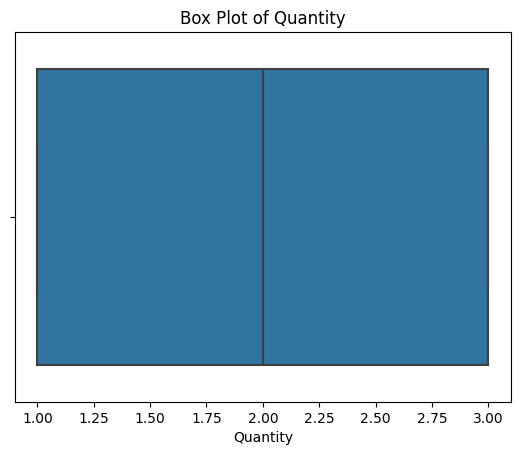

In [14]:
# Box plot the Quantity column
sns.boxplot(x=data['Quantity'])
plt.title('Box Plot of Quantity')
plt.show()


<ipython-input-15-5026d929b441>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


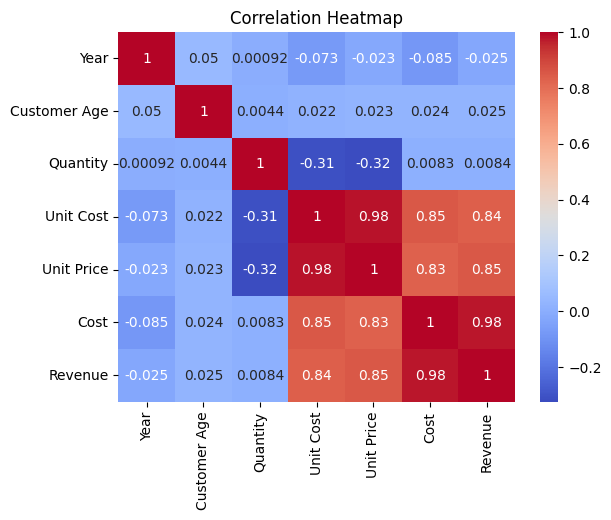

In [15]:
# Pairwise correlations
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


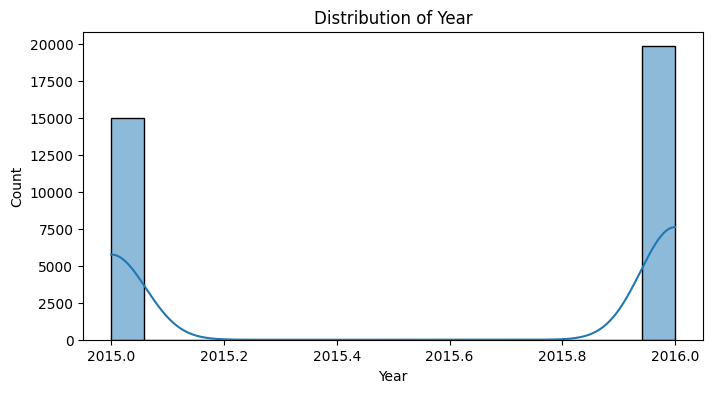

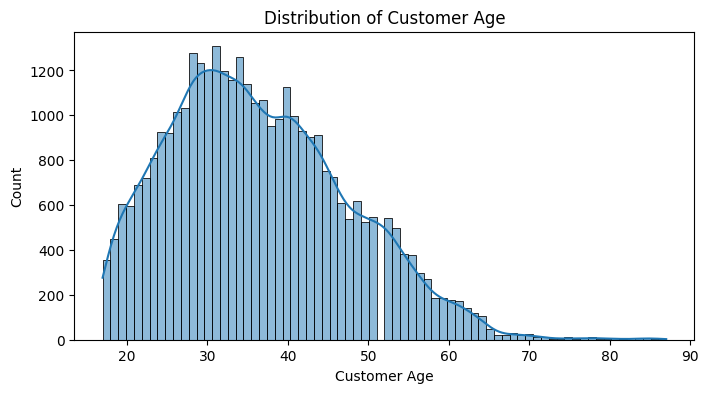

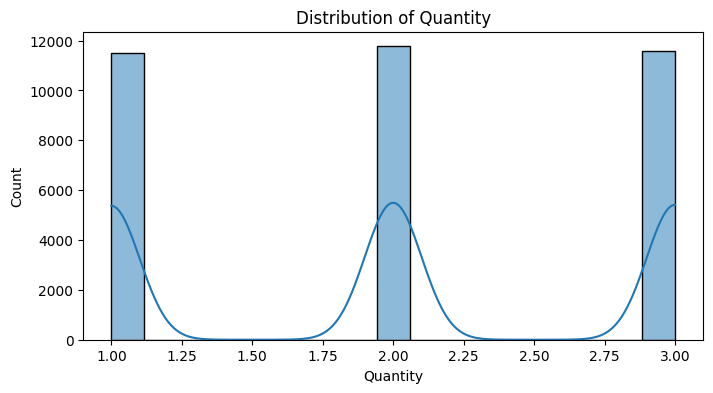

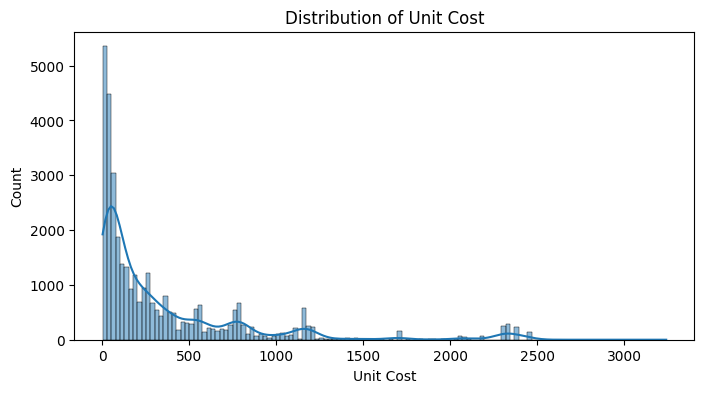

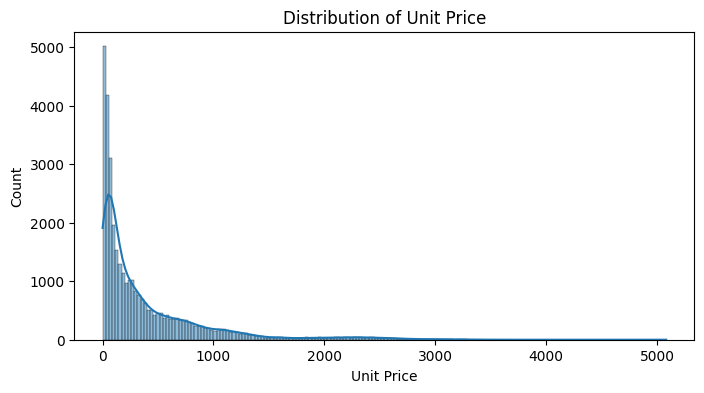

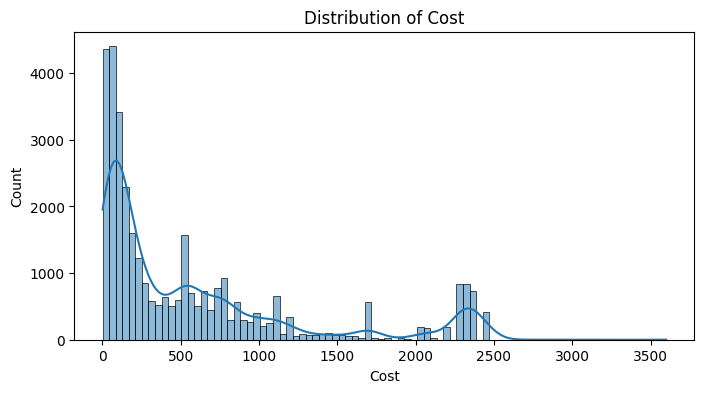

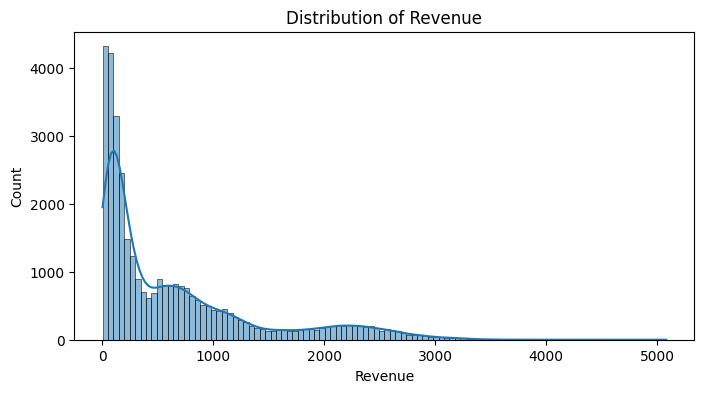

In [16]:
# Distribution of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64'])
for feature in numerical_features.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()



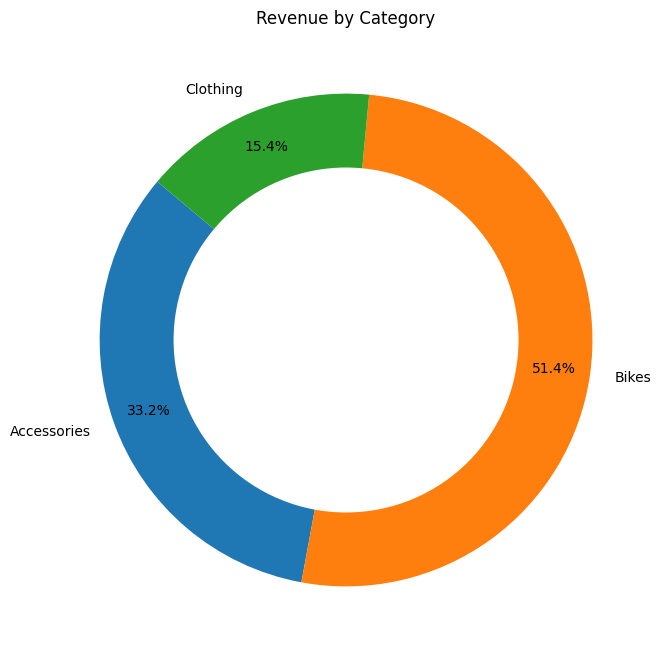

In [17]:


# Calculate total revenue by category
revenue_by_category = data.groupby('Product Category')['Revenue'].sum().reset_index()

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_category['Revenue'], labels=revenue_by_category['Product Category'], autopct='%1.1f%%', startangle=140, pctdistance=0.85, wedgeprops=dict(width=0.4))

# Add a circle in the center to make it a donut chart
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("Revenue by Category")
plt.show()


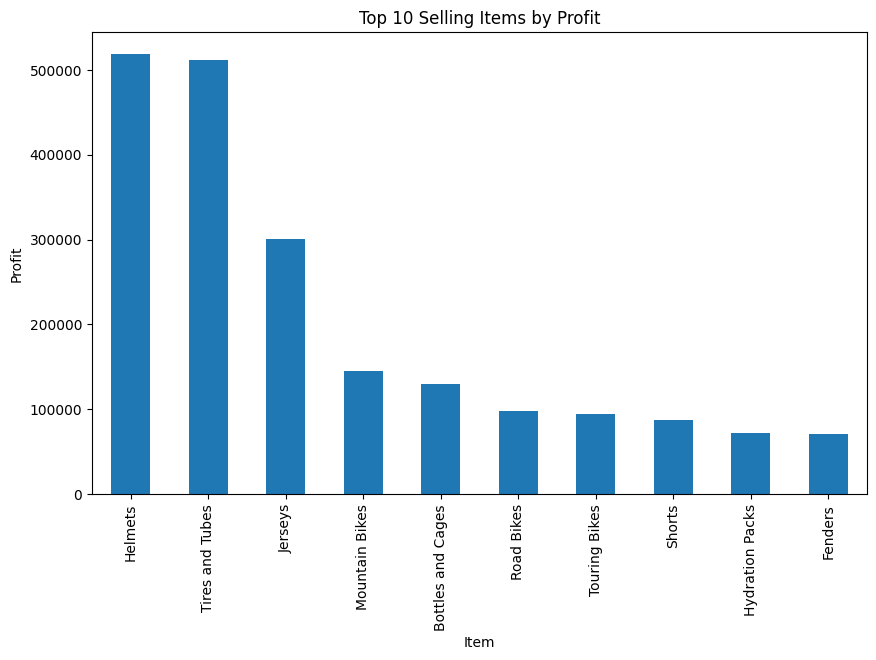

In [18]:
# top 'n' selling items
n = 10

# Calculate profit by item
profit_by_item = data.groupby('Sub Category')['Revenue'].sum() - data.groupby('Sub Category')['Cost'].sum()
top_items = profit_by_item.nlargest(n)

# Create a bar chart
top_items.plot(kind='bar', figsize=(10, 6))
plt.title(f"Top {n} Selling Items by Profit")
plt.xlabel("Item")
plt.ylabel("Profit")
plt.show()


In [19]:
import plotly.express as px


# Group by year and month and calculate total quantity sold
monthly_quantity = data.groupby(['Year', 'Month'])['Quantity'].sum().unstack()

# Transpose the DataFrame to have months on the x-axis and years stacked
monthly_quantity = monthly_quantity.T

# Create the stacked bar chart with tooltip
fig = px.bar(monthly_quantity, barmode='stack')
fig.update_layout(title="Total Quantity Sold by Month (Stacked by Year)",
                  xaxis_title="Month",
                  yaxis_title="Total Quantity Sold",
                  xaxis=dict(categoryorder='total ascending'))
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show()


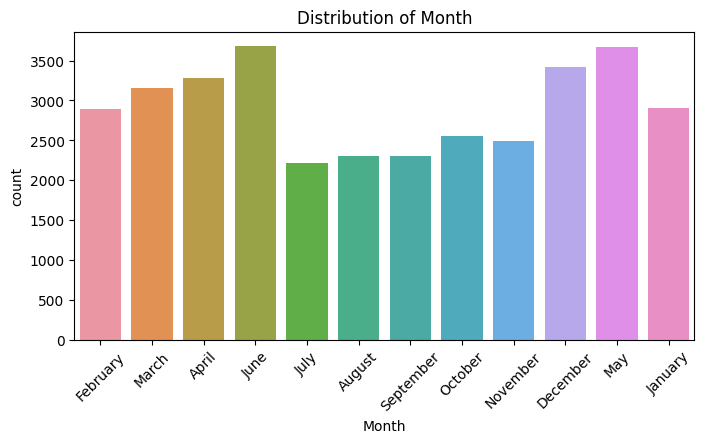

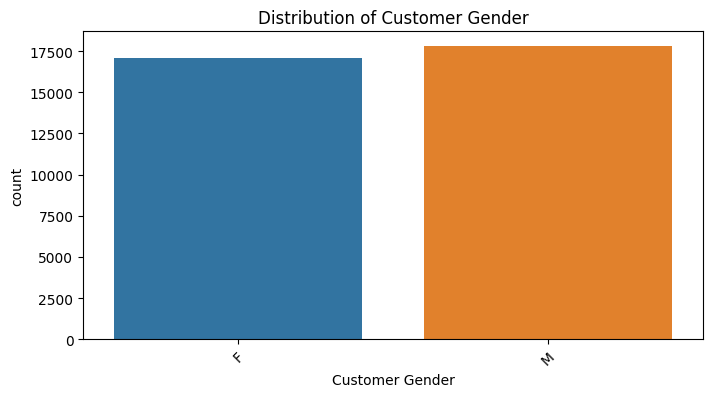

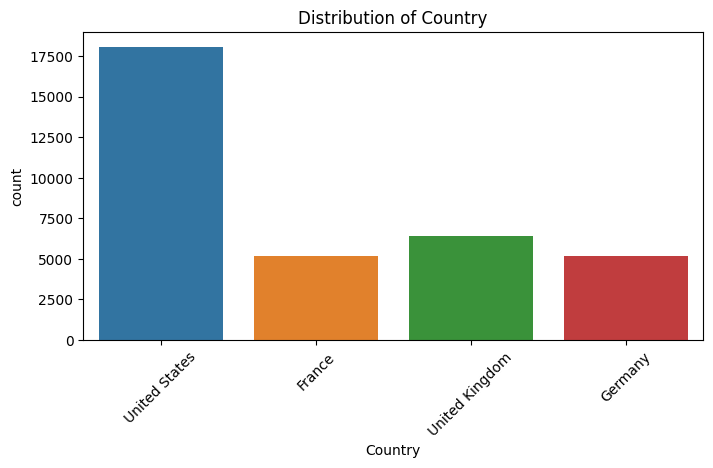

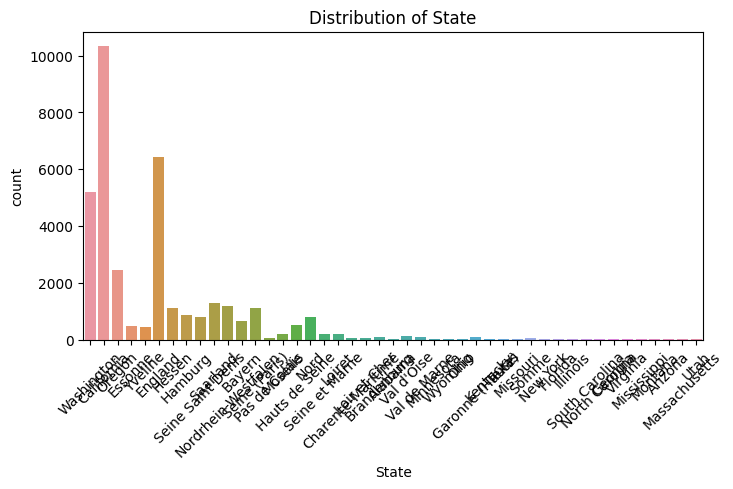

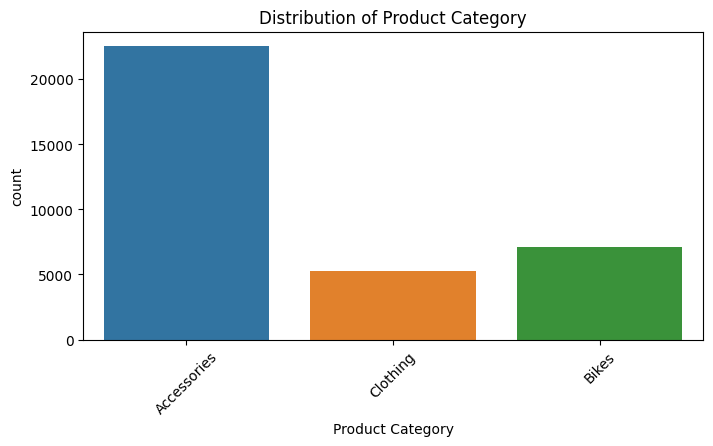

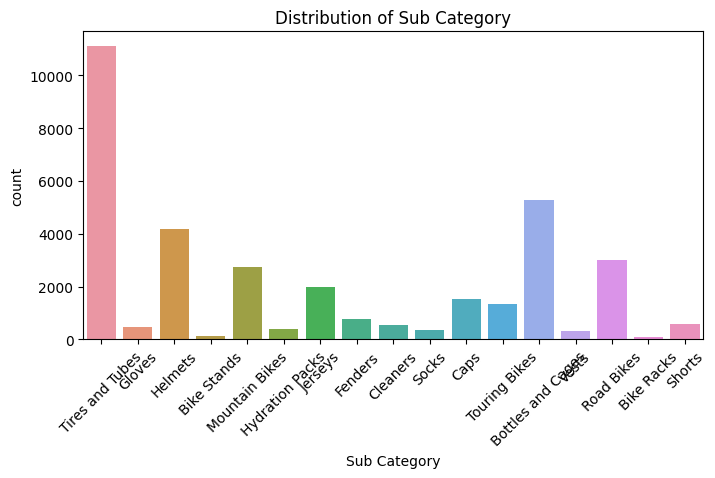

In [20]:
# Distribution of categorical features
categorical_features = data.select_dtypes(include=['object'])
for feature in categorical_features.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()


In [21]:
# Calculate and display key business metrics
total_revenue = data['Revenue'].sum()
average_revenue_per_sale = data['Revenue'].mean()
max_quantity_sold = data['Quantity'].max()
min_quantity_sold = data['Quantity'].min()

print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Average Revenue per Sale: ${average_revenue_per_sale:.2f}")
print(f"Maximum Quantity Sold in a Single Transaction: {max_quantity_sold}")
print(f"Minimum Quantity Sold in a Single Transaction: {min_quantity_sold}")


Total Revenue: $22344576.00
Average Revenue per Sale: $640.87
Maximum Quantity Sold in a Single Transaction: 3.0
Minimum Quantity Sold in a Single Transaction: 1.0


In [22]:
  # Create age groups
  age_bins = [0, 18, 35, 50, 100]
  age_labels = ['0-18', '19-35', '36-50', '51+']
  data['Age Group'] = pd.cut(data['Customer Age'], bins=age_bins, labels=age_labels, right=False)

  # Drop unnecessary columns
  data = data.drop(['State', 'Date','Customer Age'], axis=1)

  # Print the modified DataFrame
  data.head()


,Year,Month,Customer Gender,Country,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Age Group
0,2016,February,F,United States,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,19-35
1,2016,February,F,United States,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,19-35
2,2016,February,F,United States,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,19-35
3,2016,March,F,United States,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,19-35
4,2016,March,F,United States,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,19-35


In [23]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ['Customer Gender', 'Country', 'Product Category', 'Sub Category', 'Age Group']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])



In [24]:
# Assuming your DataFrame is named 'data'
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

data['Month'] = data['Month'].map(month_mapping)


In [25]:
# Print the modified DataFrame
data.head()


,Year,Month,Customer Gender,Country,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Age Group
0,2016,2,0,3,0,14,1.0,80.00,109.000000,80.0,109.0,1
1,2016,2,0,3,2,6,2.0,24.50,28.500000,49.0,57.0,1
2,2016,2,0,3,0,14,3.0,3.67,5.000000,11.0,15.0,1
3,2016,3,0,3,0,14,2.0,87.50,116.500000,175.0,233.0,1
4,2016,3,0,3,0,14,3.0,35.00,41.666667,105.0,125.0,1


In [26]:
# Define the features (X) and target variable (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (27892, 11) (27892,)
Testing set shape: (6974, 11) (6974,)


In [27]:
# correlation_matrix is your calculated correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)


                      Year     Month  Customer Gender   Country  \
Year              1.000000 -0.810662         0.027894 -0.011699   
Month            -0.810662  1.000000        -0.024741  0.027947   
Customer Gender   0.027894 -0.024741         1.000000  0.017023   
Country          -0.011699  0.027947         0.017023  1.000000   
Product Category -0.024516 -0.017166         0.005725 -0.010266   
Sub Category     -0.054561  0.032730        -0.006146 -0.022534   
Quantity          0.000919 -0.000925        -0.012050  0.000711   
Unit Cost        -0.073245 -0.018384         0.001134 -0.047341   
Unit Price       -0.022628 -0.051448         0.002144 -0.072139   
Cost             -0.084566 -0.019345        -0.000588 -0.052590   
Revenue          -0.025361 -0.058461         0.000097 -0.082924   
Age Group         0.044743 -0.039844        -0.021241  0.097224   

                  Product Category  Sub Category  Quantity  Unit Cost  \
Year                     -0.024516     -0.054561  0.000

In [28]:

# Calculate skewness of the 'Revenue' column
skewness = data['Revenue'].skew()

# Check if skewness is greater than a threshold (e.g., 1)
if abs(skewness) > 1:
    # Apply log transformation
    data['Revenue'] = np.log1p(data['Revenue'])
    print("Log transformation applied.")

# Calculate IQR for outlier detection
Q1 = data['Revenue'].quantile(0.25)
Q3 = data['Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Check if outliers are present
outliers = ((data['Revenue'] < Q1 - 1.5 * IQR) | (data['Revenue'] > Q3 + 1.5 * IQR)).sum()
if outliers > 0:
    print(f"{outliers} outliers detected and removed using IQR.")
    # Remove outliers
    data = data[(data['Revenue'] >= Q1 - 1.5 * IQR) & (data['Revenue'] <= Q3 + 1.5 * IQR)]

# Display the updated DataFrame
print(data.head())



Log transformation applied.
16 outliers detected and removed using IQR.
   Year  Month  Customer Gender  Country  Product Category  Sub Category  \
0  2016      2                0        3                 0            14   
1  2016      2                0        3                 2             6   
2  2016      2                0        3                 0            14   
3  2016      3                0        3                 0            14   
4  2016      3                0        3                 0            14   

   Quantity  Unit Cost  Unit Price   Cost   Revenue  Age Group  
0       1.0      80.00  109.000000   80.0  4.700480          1  
1       2.0      24.50   28.500000   49.0  4.060443          1  
2       3.0       3.67    5.000000   11.0  2.772589          1  
3       2.0      87.50  116.500000  175.0  5.455321          1  
4       3.0      35.00   41.666667  105.0  4.836282          1  


In [29]:
data.head()

,Year,Month,Customer Gender,Country,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Age Group
0,2016,2,0,3,0,14,1.0,80.00,109.000000,80.0,4.700480,1
1,2016,2,0,3,2,6,2.0,24.50,28.500000,49.0,4.060443,1
2,2016,2,0,3,0,14,3.0,3.67,5.000000,11.0,2.772589,1
3,2016,3,0,3,0,14,2.0,87.50,116.500000,175.0,5.455321,1
4,2016,3,0,3,0,14,3.0,35.00,41.666667,105.0,4.836282,1


In [30]:
# Calculate the 5-number summary for 'Revenue'
five_number_summary_revenue = data['Revenue'].describe(percentiles=[.25, .5, .75])
print(five_number_summary_revenue)


count    34850.000000
mean         5.670532
std          1.428312
min          1.386294
25%          4.634729
50%          5.768321
75%          6.806553
max          8.533657
Name: Revenue, dtype: float64


In [31]:
  from sklearn.preprocessing import StandardScaler

  # Features (excluding 'Revenue' and 'Date')
  X = data.drop(['Revenue'], axis=1)

  # Initialize StandardScaler
  scaler = StandardScaler()

  # Scale the features
  X_scaled = scaler.fit_transform(X)


In [32]:
# Target variable
y = data['Revenue']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

model completed


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate performance using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the regression metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')


Mean Squared Error (MSE): 0.0010
Mean Absolute Error (MAE): 0.0124
R-squared (R2): 0.9995


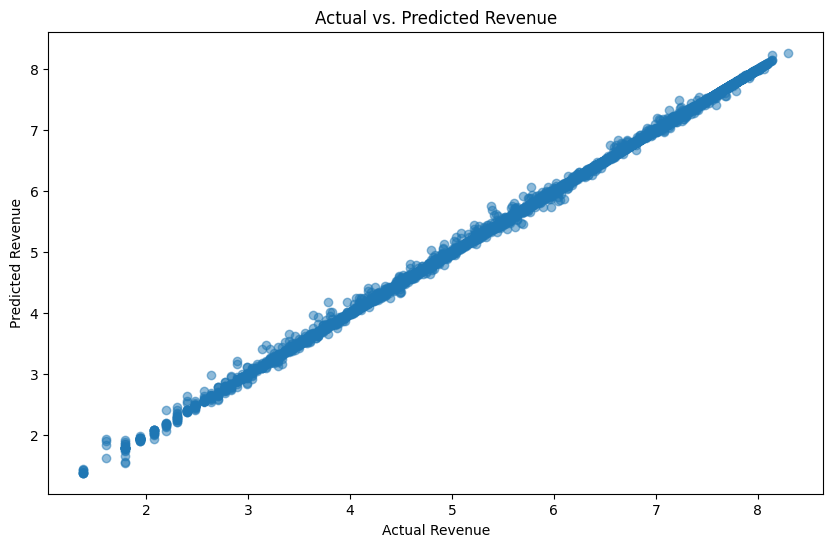

In [35]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Revenue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.show()


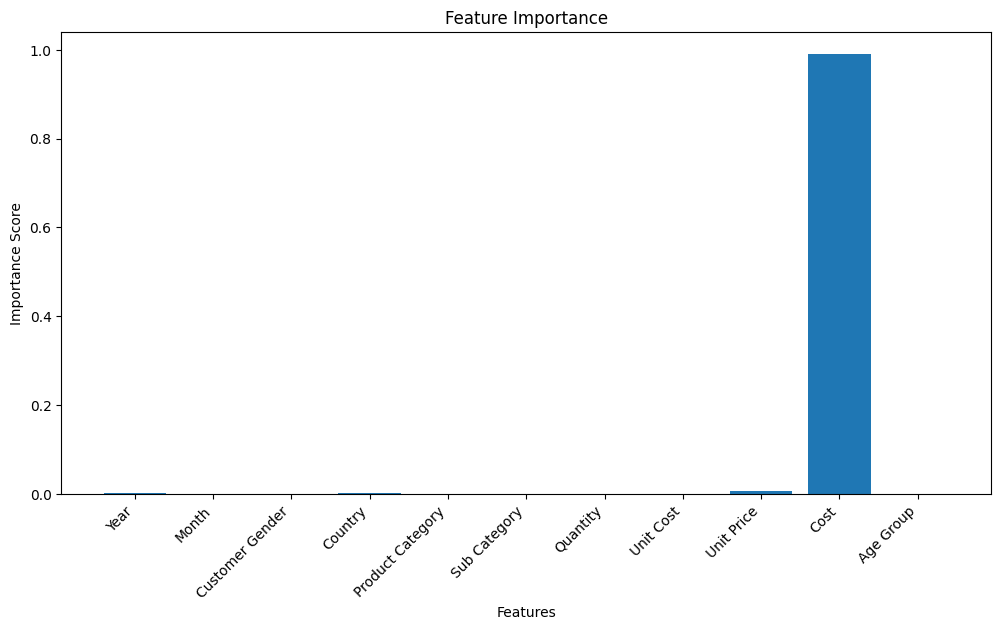

In [36]:
# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a bar plot of feature importances
features = X.columns
plt.figure(figsize=(12, 6))
plt.bar(features, feature_importances)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 150}


In [ ]:
# Initialize the model with the best hyperparameters
optimal_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Fit the model to the training data
optimal_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_optimal = optimal_model.predict(X_test)

# Evaluate the performance of the optimized model
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
mae_optimal = mean_absolute_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)

# Display the performance metrics
print("Optimized Model Performance:")
print(f"Mean Squared Error (MSE): {mse_optimal:.4f}")
print(f"Mean Absolute Error (MAE): {mae_optimal:.4f}")
print(f"R-squared (R2): {r2_optimal:.4f}")


Optimized Model Performance:
Mean Squared Error (MSE): 0.0010
Mean Absolute Error (MAE): 0.0123
R-squared (R2): 0.9995


In [37]:
  # Check Training Performance
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training Set Metrics:')
print(f'Mean Squared Error (MSE): {train_mse:.4f}')
print(f'Mean Absolute Error (MAE): {train_mae:.4f}')
print(f'R-squared (R2): {train_r2:.4f}')

# Cross-Validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print(f'Cross-Validation R-squared scores: {cv_scores}')

# Hyperparameter Tuning (if needed)
# Example: Reduce the number of trees
model_tuned = RandomForestRegressor(n_estimators=50, random_state=42)
model_tuned.fit(X_train, y_train)

# Evaluate tuned model
y_test_tuned = model_tuned.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_test_tuned)
mae_tuned = mean_absolute_error(y_test, y_test_tuned)
r2_tuned = r2_score(y_test, y_test_tuned)

print(f'Tuned Model Metrics:')
print(f'Mean Squared Error (MSE): {mse_tuned:.4f}')
print(f'Mean Absolute Error (MAE): {mae_tuned:.4f}')
print(f'R-squared (R2): {r2_tuned:.4f}')


Training Set Metrics:
Mean Squared Error (MSE): 0.0002
Mean Absolute Error (MAE): 0.0049
R-squared (R2): 0.9999
Cross-Validation R-squared scores: [0.99942101 0.99951231 0.99945827 0.99936641 0.99947265]
Tuned Model Metrics:
Mean Squared Error (MSE): 0.0011
Mean Absolute Error (MAE): 0.0130
R-squared (R2): 0.9995


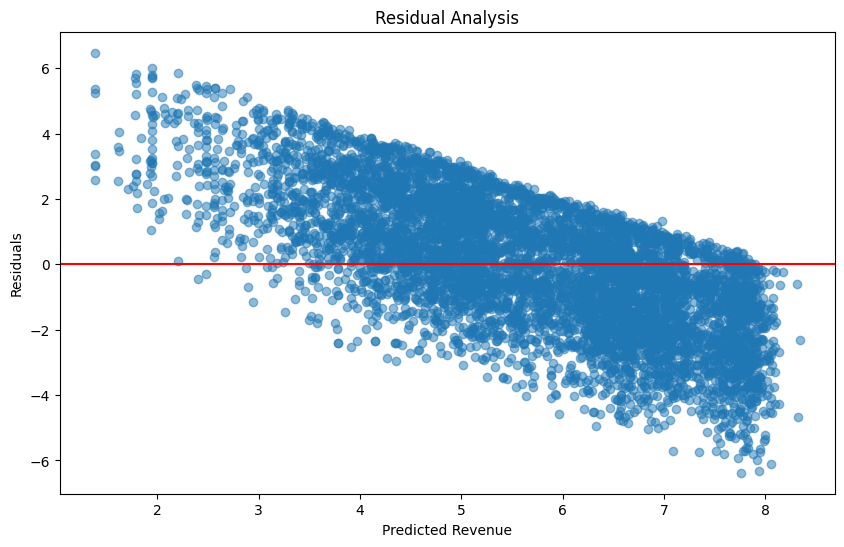

In [48]:
# Residual Analysis
residuals = y_test.reset_index(drop=True) - pd.Series(y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Analysis')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [38]:
X_quantity = data.drop(['Revenue', 'Quantity'], axis=1)
y_quantity = data['Quantity']

# Step 4: Train-Test Split
X_train_quantity, X_test_quantity, y_train_quantity, y_test_quantity = train_test_split(X_quantity, y_quantity, test_size=0.2, random_state=42)

# Step 5: Model Selection and Training
quantity_model = RandomForestRegressor(n_estimators=100, random_state=42)
quantity_model.fit(X_train_quantity, y_train_quantity)

# Step 6: Model Evaluation
# Predict on the testing set
y_pred_quantity = quantity_model.predict(X_test_quantity)

# Evaluate performance using regression metrics
mse_quantity = mean_squared_error(y_test_quantity, y_pred_quantity)
mae_quantity = mean_absolute_error(y_test_quantity, y_pred_quantity)
r2_quantity = r2_score(y_test_quantity, y_pred_quantity)

# Display the regression metrics for quantity prediction
print(f'Mean Squared Error (MSE) for Quantity: {mse_quantity:.4f}')
print(f'Mean Absolute Error (MAE) for Quantity: {mae_quantity:.4f}')
print(f'R-squared (R2) for Quantity: {r2_quantity:.4f}')

Mean Squared Error (MSE) for Quantity: 0.0001
Mean Absolute Error (MAE) for Quantity: 0.0004
R-squared (R2) for Quantity: 0.9999


In [39]:
# Assuming your model is named 'model'
y_pred_test = model.predict(X_test)


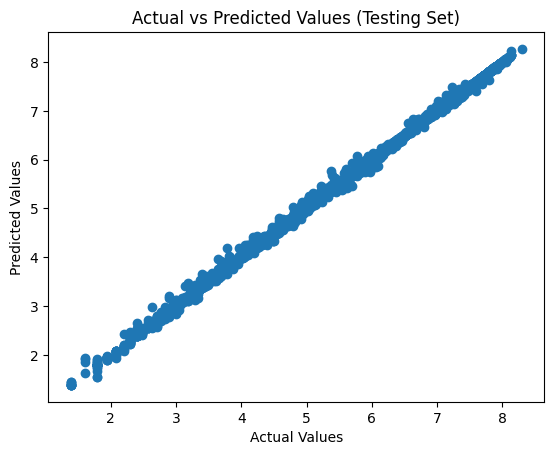

In [42]:


# Scatter plot of actual vs predicted values for testing set
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Testing Set)')
plt.show()


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Display the metrics
print(f'Mean Squared Error (MSE) for Testing: {mse_test:.4f}')
print(f'Mean Absolute Error (MAE) for Testing: {mae_test:.4f}')
print(f'R-squared (R2) for Testing: {r2_test:.4f}')


Mean Squared Error (MSE) for Testing: 0.0010
Mean Absolute Error (MAE) for Testing: 0.0124
R-squared (R2) for Testing: 0.9995


In [41]:
# Display training metrics
print(f'Mean Squared Error (MSE) for Training: {train_mse:.4f}')
print(f'Mean Absolute Error (MAE) for Training: {train_mae:.4f}')
print(f'R-squared (R2) for Training: {train_r2:.4f}')


Mean Squared Error (MSE) for Training: 0.0002
Mean Absolute Error (MAE) for Training: 0.0049
R-squared (R2) for Training: 0.9999
